Neural Networks (Deep Learning)
Multilayer perceptrons (MLPs) can be view as generalizations of linear models that perform multiple stages of processing to come to a decision. 
The prediction by a linear regressor is given as:
y = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b
y is the weighted sum of the input features x[0] to x[p], weighted by the learned coefficients w[0] to w[p].

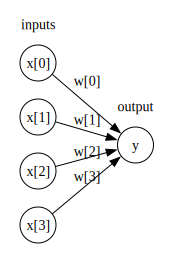

In [1]:
# We could visualize the above as shown below
import mglearn
display(mglearn.plots.plot_logistic_regression_graph())

Here, each node on the left represents an input feature, the connecting lines represent the learned coefficients, and the node on the right represents the output, which is a weighted sum of the inputs.

In MLP this process of computing weighted sums is repeated multiple times, first computing hidden units that represent an intermediate processing step, which are again combined using weighted sums to yield the final result.

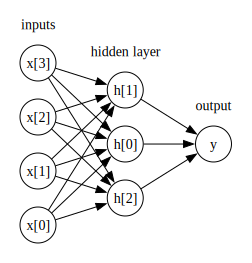

In [2]:
display(mglearn.plots.plot_single_hidden_layer_graph())

Computing a series of weighted sums is mathematically teh same as computing just one weighted sum, so to make this model more powerful than a linear model, we need one extra trick. After computing a weighted sum for each hidden unit, a nonlinear function is applied to the result -- usually rectifying nonlinearity or the tangens hyperbolicus (tanh). The result of this function is then used in teh weighted sum that computes the output y. The two functions are visualized in the below graph.

Text(0, 0.5, 'relu(x), tanh(x)')

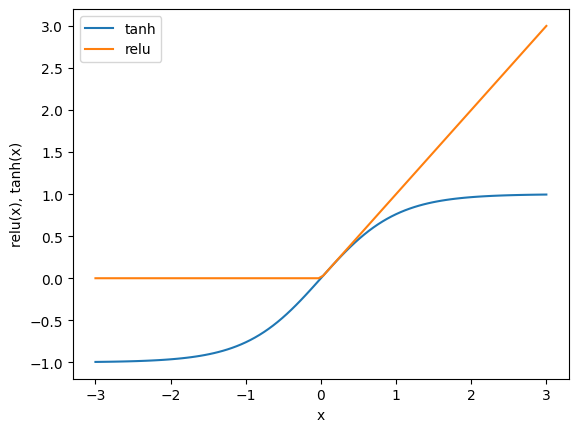

In [3]:
import numpy as np
line = np.linspace(-3,3, 100)
import matplotlib.pyplot as plt
plt.plot(line, np.tanh(line), label='tanh')
plt.plot(line, np.maximum(line,0), label='relu')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

Text(0, 0.5, 'feature 1')

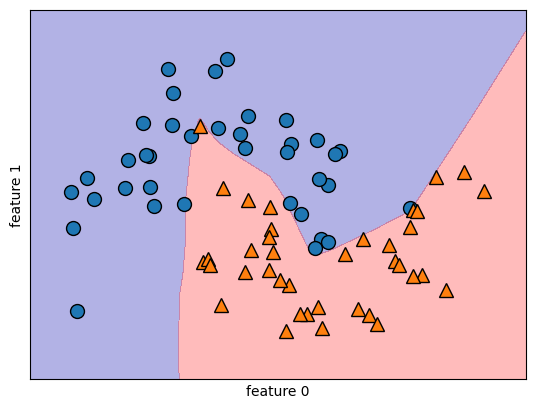

In [4]:
# we will work on tuning neural networks
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

c:\Users\ashle\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'feature 1')

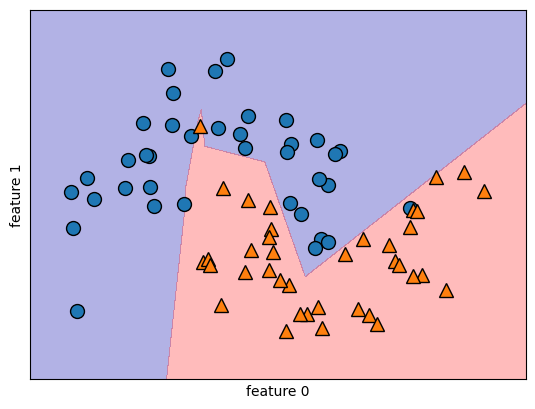

In [5]:
# by default, MLP uses 100 hidden nodes, which is a lot for this dataset
# we can reduce the number of nodes and still get a good result
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('feature 0')
plt.ylabel('feature 1')


Text(0, 0.5, 'feature 1')

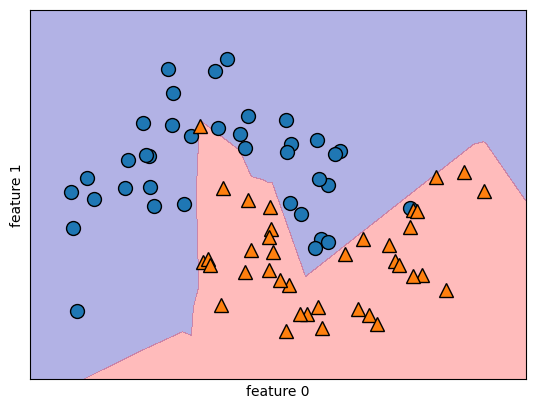

In [6]:
# using two hidden layers, with 10 units each, now with tanh nonlinearity
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10,10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

Finally, we can also control the complexity of a neural network by using an l2 penalty to shrink the weights toward zero, as we did int eh rdige regression and the linear classifiers. The parameter for this in the MLPClassifier is alpha, and it's set to a very low value by default.

c:\Users\ashle\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\ashle\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("

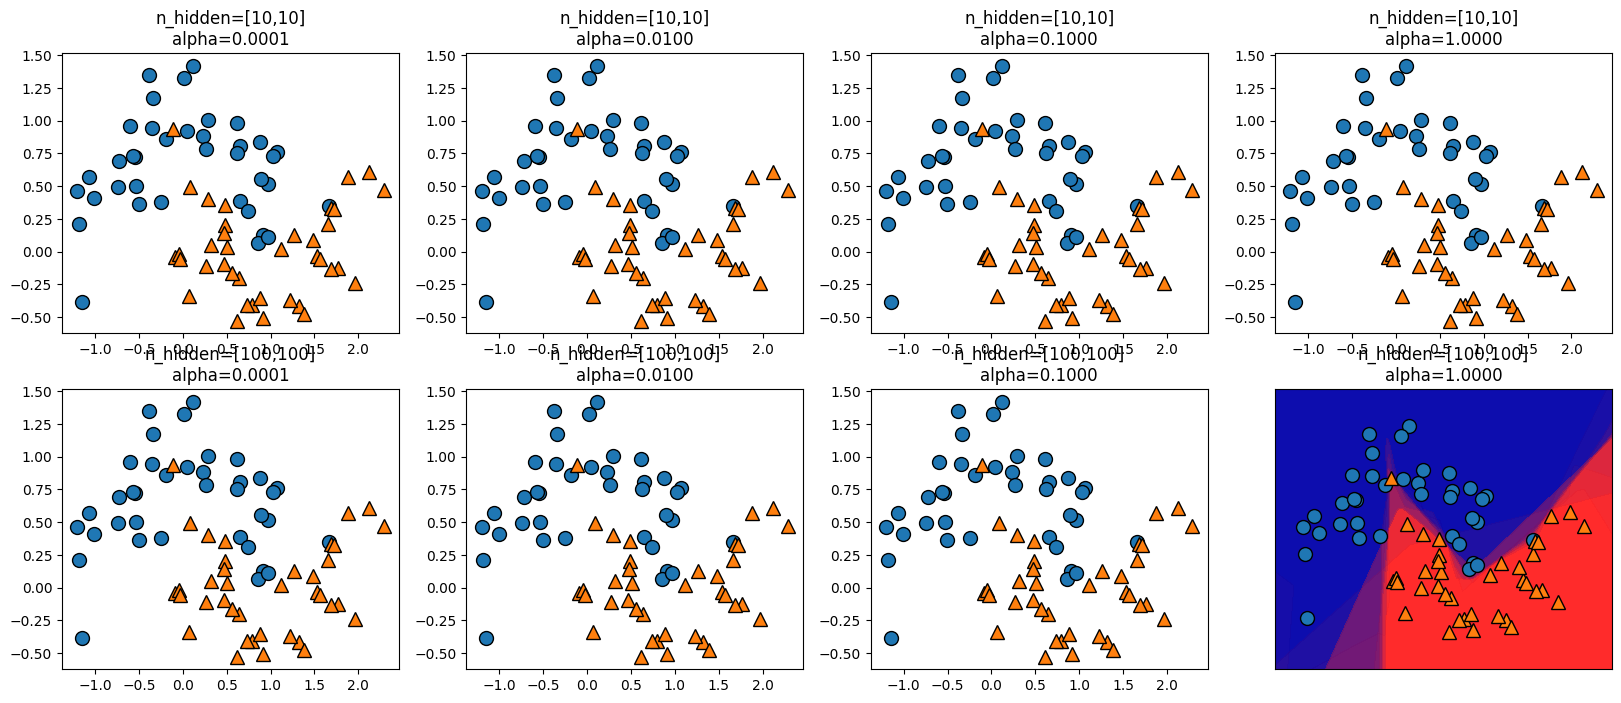

In [7]:
fig, axes = plt.subplots(2, 4, figsize=(20,8))
for axx, n_hidden_nodes in zip(axes, [10,100]):
    for ax, alpha in zip(axx,[0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
        mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)
        ax.set_title('n_hidden=[{},{}]\nalpha={:.4f}'.format(n_hidden_nodes, n_hidden_nodes, alpha))